<h1>Twitter Text Report</h1>
<h2> Kay Shrieve</h2>
<h4>Data In EMAT | April 4th, 2020</h4>

This report is going to go through online posts, made between March 15th 2021 and March 28th 2021 related to the HPV vaccine. The posts had come from Twitter, Reddit and various news sources and complied into a CSV file. I want to see what the most common used words in these posts are, and if they are leaning more negative, positive, or neutral (based on my own personal bias). 

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings


<h3>1. the data</h3> 

Below I am importing the data (the various posts) in the form of a CSV file to turn it into data I can manipulate via Python. I got this CSV from my professor, Dr. Silva, who compiled it from sources around the internet. 

In [4]:
oly_uniq = pd.read_csv('/Users/kaylashrieve/Desktop/spreadsheets/HPVVaccination_Mar15Mar28_2012_fixed (1).csv')
oly_uniq.keys()

Index(['Unnamed: 0', 'Date', 'Title', 'Url', 'Domain', 'Language', 'Author',
       'Full Name', 'Full Text', 'Impressions', 'Original Url',
       'Thread Author', 'Thread Created Date', 'Thread Entry Type',
       'Twitter Followers', 'Twitter Following', 'Twitter Reply Count',
       'Twitter Retweets', 'Twitter Verified'],
      dtype='object')

In [5]:
oly_uniq['Full Text'].head(20)

0     RT @NCIDirector #CervicalCancer kills approxim...
1     @HaveyJAggie @TheQuartering Umm sure but ya kn...
2     Nukepro Posted That Only 1% Of Vaccine Deaths ...
3     If you haven't gotten it yet, you really shoul...
4     1. Who said that the *genuinely* medically exe...
5     Hi folks, my wife has become persuaded by her ...
6     You see how the HPV vaccine was pushed so hard...
7     First of all “my body my choice” applies to va...
8     [https://www.baumhedlundlaw.com/prescription-d...
9     First of all “my body my choice” applies to va...
10    It means that your immune system is reacting t...
11    RT @debunkdenialism Why is the HPV vaccine imp...
12    Oh my god. Holy shit. I haven’t found anyone e...
13    My take: 1) for commercial air travel anywhere...
14    ...the first cohort of 40 participants for its...
15    RT @drmoleary After all the hard work that's g...
16    ...deaths and cases of disability rising post-...
17    This actually terrifies me. Besides a comp

In [6]:
oly_uniq['text_lower'] = [x.lower() for x in oly_uniq['Full Text']]
oly_uniq['text_lower'][0]

'rt @ncidirector #cervicalcancer kills approximately 300,000 women globally each year. with the #hpv vaccine and more accessible screening methods, such as self-sampling, it’s possible to prevent cervical cancer entirely or catch it early enough to cure it. #nothingwillstopus'

In [7]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
import pandas as pd
from nltk.corpus import stopwords
import matplotlib
import string

<h2>1.2</h2>
After importing the data, I am taking out the most commonly used words and isolating them from the rest of the tweets, reddit posts, and news articles. I also take out any puncuation, as it it technically counted in a word count, and very common words such as "a", "and", "the" and other words like that, and filter them out to get my final list of most used words.


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaylashrieve/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
oly_uniq['tokens'] = [tk.word_tokenize(x) for x in oly_uniq['text_lower']]
oly_uniq['tokens'][0]

['rt',
 '@',
 'ncidirector',
 '#',
 'cervicalcancer',
 'kills',
 'approximately',
 '300,000',
 'women',
 'globally',
 'each',
 'year',
 '.',
 'with',
 'the',
 '#',
 'hpv',
 'vaccine',
 'and',
 'more',
 'accessible',
 'screening',
 'methods',
 ',',
 'such',
 'as',
 'self-sampling',
 ',',
 'it',
 '’',
 's',
 'possible',
 'to',
 'prevent',
 'cervical',
 'cancer',
 'entirely',
 'or',
 'catch',
 'it',
 'early',
 'enough',
 'to',
 'cure',
 'it',
 '.',
 '#',
 'nothingwillstopus']

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaylashrieve/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s")

In [14]:
filtered = []
for i in oly_uniq['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
oly_uniq['filtered'] = filtered

In [15]:
oly_uniq['filtered'][2]

['nukepro',
 'posted',
 '1',
 '%',
 'vaccine',
 'deaths',
 'reported',
 'vaers',
 '--',
 'support',
 'stock',
 ':',
 'use',
 'quite',
 'lot',
 'words',
 'say',
 'thing',
 ',',
 'good',
 'backup',
 '.',
 'relatives',
 'decry',
 'use',
 '``',
 'conspiracy',
 'site',
 'nukepro',
 "''",
 '....',
 'lol',
 'https',
 ':',
 '//thevaccinereaction.org/2020/01/only-one-percent-of-vaccine-reactions-reported-to-vaers/',
 '2009',
 'study',
 'published',
 'jama',
 '“',
 'postlicensure',
 'safety',
 'surveillance',
 'quadrivalent',
 'human',
 'papillomavirus',
 'recombinant',
 'vaccine',
 ',',
 '”',
 'found',
 'vaers',
 'data',
 'analysis',
 'limitations',
 'include',
 '“',
 'underreporting',
 ',',
 'inconsistency',
 'quality',
 'completeness',
 'reported',
 'data',
 ',',
 'stimulated',
 'reporting',
 'due',
 'extensive',
 'news',
 'coverage',
 'reporting',
 'biases.',
 '”',
 'researchers',
 'stated',
 ':',
 'limitation',
 'vaers',
 'reports',
 'qhpv',
 '[',
 'quadrivalent',
 'hpv',
 'vaccine',
 ']',


In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
no_punct = []
for i in oly_uniq['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
oly_uniq['no_punct'] = no_punct
oly_uniq['no_punct'][2]

['nukepro',
 'posted',
 '1',
 'vaccine',
 'deaths',
 'reported',
 'vaers',
 '--',
 'support',
 'stock',
 'use',
 'quite',
 'lot',
 'words',
 'say',
 'thing',
 'good',
 'backup',
 'relatives',
 'decry',
 'use',
 '``',
 'conspiracy',
 'site',
 'nukepro',
 "''",
 '....',
 'lol',
 'https',
 '//thevaccinereaction.org/2020/01/only-one-percent-of-vaccine-reactions-reported-to-vaers/',
 '2009',
 'study',
 'published',
 'jama',
 '“',
 'postlicensure',
 'safety',
 'surveillance',
 'quadrivalent',
 'human',
 'papillomavirus',
 'recombinant',
 'vaccine',
 '”',
 'found',
 'vaers',
 'data',
 'analysis',
 'limitations',
 'include',
 '“',
 'underreporting',
 'inconsistency',
 'quality',
 'completeness',
 'reported',
 'data',
 'stimulated',
 'reporting',
 'due',
 'extensive',
 'news',
 'coverage',
 'reporting',
 'biases.',
 '”',
 'researchers',
 'stated',
 'limitation',
 'vaers',
 'reports',
 'qhpv',
 'quadrivalent',
 'hpv',
 'vaccine',
 'large',
 'proportion',
 '68',
 'come',
 'manufacturer',
 'report

In [18]:
freq1 = [FreqDist(x) for x in oly_uniq['no_punct']]
oly_uniq['freqs1'] = freq1
oly_uniq['freqs1']

0       {'rt': 1, 'ncidirector': 1, 'cervicalcancer': ...
1       {'haveyjaggie': 1, 'thequartering': 1, 'umm': ...
2       {'nukepro': 2, 'posted': 1, '1': 1, 'vaccine':...
3       {'gotten': 1, 'yet': 1, 'really': 1, 'start': ...
4       {'1.': 1, 'said': 3, 'genuinely': 1, 'medicall...
                              ...                        
5893    {'quite': 1, 'unlikely': 1, 'true': 2, 'steril...
5894    {'ingrahamangle': 1, '’': 2, 'need': 1, 'team'...
5895    {'taking': 1, 'hpv': 1, 'vaccine': 1, 'second'...
5896    {'insurance': 1, 'typically': 1, 'covers': 1, ...
5897    {'...': 2, 'great': 1, 'success': 1, 'novel': ...
Name: freqs1, Length: 5898, dtype: object

<h3>1.3</h3>
After filtering out the words I need, I am taking my final list and making a count of the frequency of the words. I then turn them into a dataframe so it is easier to view. 

In [19]:
from collections import Counter

In [20]:
A = Counter(oly_uniq['freqs1'][0])
B = Counter(oly_uniq['freqs1'][1])
A + B

Counter({'rt': 1,
         'ncidirector': 1,
         'cervicalcancer': 1,
         'kills': 1,
         'approximately': 1,
         '300,000': 1,
         'women': 1,
         'globally': 1,
         'year': 1,
         'hpv': 2,
         'vaccine': 2,
         'accessible': 1,
         'screening': 1,
         'methods': 1,
         'self-sampling': 1,
         '’': 1,
         'possible': 1,
         'prevent': 1,
         'cervical': 1,
         'cancer': 1,
         'entirely': 1,
         'catch': 1,
         'early': 1,
         'enough': 1,
         'cure': 1,
         'nothingwillstopus': 1,
         'haveyjaggie': 1,
         'thequartering': 1,
         'umm': 1,
         'sure': 1,
         'ya': 1,
         'know': 1,
         'emergency': 1,
         'authorization': 1,
         'fda': 1,
         'approved': 1,
         'still': 1,
         'finding': 1,
         'long': 1,
         'term': 1,
         'side': 1,
         'effects': 1,
         'thank': 1})

In [21]:
oly_uniq['f1_counts'] = [Counter(x) for x in oly_uniq['freqs1']]
oly_uniq['f1_counts'][0]

Counter({'rt': 1,
         'ncidirector': 1,
         'cervicalcancer': 1,
         'kills': 1,
         'approximately': 1,
         '300,000': 1,
         'women': 1,
         'globally': 1,
         'year': 1,
         'hpv': 1,
         'vaccine': 1,
         'accessible': 1,
         'screening': 1,
         'methods': 1,
         'self-sampling': 1,
         '’': 1,
         'possible': 1,
         'prevent': 1,
         'cervical': 1,
         'cancer': 1,
         'entirely': 1,
         'catch': 1,
         'early': 1,
         'enough': 1,
         'cure': 1,
         'nothingwillstopus': 1})

In [22]:
wordcounts = Counter()
for i in oly_uniq['f1_counts']:
    wordcounts += i

In [23]:
len(wordcounts)

24941

In [24]:
type(wordcounts)

collections.Counter

In [25]:
dict(wordcounts)

{'rt': 2083,
 'ncidirector': 12,
 'cervicalcancer': 97,
 'kills': 21,
 'approximately': 73,
 '300,000': 12,
 'women': 1005,
 'globally': 23,
 'year': 562,
 'hpv': 7089,
 'vaccine': 8523,
 'accessible': 17,
 'screening': 173,
 'methods': 33,
 'self-sampling': 11,
 '’': 3822,
 'possible': 190,
 'prevent': 380,
 'cervical': 1407,
 'cancer': 2742,
 'entirely': 34,
 'catch': 88,
 'early': 117,
 'enough': 122,
 'cure': 105,
 'nothingwillstopus': 21,
 'haveyjaggie': 1,
 'thequartering': 1,
 'umm': 1,
 'sure': 175,
 'ya': 8,
 'know': 614,
 'emergency': 58,
 'authorization': 16,
 'fda': 114,
 'approved': 142,
 'still': 502,
 'finding': 64,
 'long': 260,
 'term': 85,
 'side': 340,
 'effects': 374,
 'thank': 77,
 'nukepro': 3,
 'posted': 74,
 '1': 241,
 'deaths': 186,
 'reported': 226,
 'vaers': 28,
 '--': 252,
 'support': 171,
 'stock': 30,
 'use': 498,
 'quite': 62,
 'lot': 174,
 'words': 33,
 'say': 271,
 'thing': 192,
 'good': 320,
 'backup': 3,
 'relatives': 4,
 'decry': 2,
 '``': 2047,
 'co

In [26]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts

,0
rt,2083
ncidirector,12
cervicalcancer,97
kills,21
approximately,73
...,...
weary,1
arrives,1
cross-neutralizing,1
sarbecoviruses10,1


In [27]:
counts = counts.rename(columns = {0: 'counts'})
counts

,counts
rt,2083
ncidirector,12
cervicalcancer,97
kills,21
approximately,73
...,...
weary,1
arrives,1
cross-neutralizing,1
sarbecoviruses10,1


In [28]:
count_sort = counts.sort_values('counts', ascending = False)[:20]
count_sort

,counts
vaccine,8523
hpv,7089
’,3822
...,3246
cancer,2742
get,2166
https,2124
rt,2083
``,2047
'',2005


<h3>2. Visualization</h3>
After filtering out and getting the frequency of my words, I then make them into a bar graph. As you can see down below, the top 5 most frequently used words in the posts are "vaccine", "hpv", "cancer", "get" and "https". 

These are pretty par for the course as the HPV vaccine is a vaccine that is typically thought of to prevent cervical cancer in women, and it also shows that links are used quite a bit in posts about this. This could be because posts were pulled from reddit, which external links are used a lot on. 

In [29]:
from matplotlib import pyplot as plt

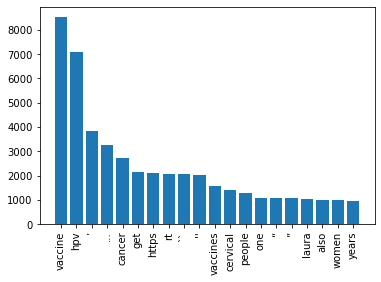

In [33]:
fig, ax0 = plt.subplots()
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'medium')
plt.show()

<h3>3. Final thoughts</h3> 

The top words used in posts about the HPV vaccine are:
1. Vaccine
2. hpv
3. cancer
4. get
5. https
6. rt
7. vaccines
8. cervical
9. people
10. one
11. laura 
12. also
13. women 
14. years 

I believe that these words are all very neutral in regards to a vaccine, especially when some posts about it were pulled from Twitter and Reddit, which can be very anti - vaccination in some spaces. The only one I was confused about showing up so much was the word Laura, but after further research, Laura Berman was a doctor, with HPV that developed into cervical cancer, that passed away earlier this year. She was also an advocate for women getting the vaccine, as it is optional, so it makes sense that her name pops up so much when parsing posts regarding the HPV vaccine. It also shows that "rt" and "https" are very common words being used, which would be from twitter and reddit (assumingly). The "rt" pops up when things are quote tweeted, and since links are not commonly used in news articles and tweets (due to limited word count), the 'https' is probably from linking external sites on Reddit. 

I did try to take out puncuation, but for some reason the "" and all other forms of quotes stayed (after multiple attempts and visits to stackoverflow), even though I filtered them out. They showed up in the final word count, probably due to quotes in news articles and the fact that quote tweets do have the quote marks in them. 